### "Продвинутая линейная алгебра"

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Диагональная, ортогональная, но не единичная(!)

In [2]:
A = np.diag([-1,-1,-1])

In [3]:
# Проверочка
(A.T) @ A

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [4]:
b, G = np.linalg.eig(A)
(G @ np.diag(b)) @ np.linalg.inv(G)

array([[-1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

Матрица, у которой определитель = 1, и все элементы не равны 0

In [5]:
D = np.array([[2,1],[1,1]])
print(D)

[[2 1]
 [1 1]]


In [6]:
det = np.linalg.det(D)
print(det)

1.0


### Найдите собственные значения и собственные вектора матриц

In [7]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [8]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Найдите спектральное разложение матрицы:

In [9]:
# Исходная матрица
m = np.array([[1, 2],[2, 3]])

In [10]:
print(m)

[[1 2]
 [2 3]]


In [11]:
# Найдем собственные значения матрицы и собственные вектора матрицы
a, U = np.linalg.eigh(m)
print('Eigenvalues:')
print(np.array(a))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [12]:
# Разложив матрицу проверим равенство
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


### Задание 2 

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [13]:
# Загружаем данные из библиотеки sklearn
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [14]:
# The flattened data matrix.
print(X.shape)

# The classification target.
print(y.shape)

(1797, 64)
(1797,)


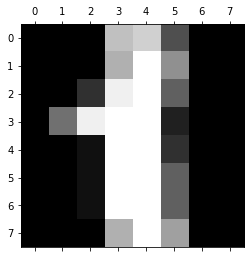

In [15]:
# Исходные данные
image = X[1]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

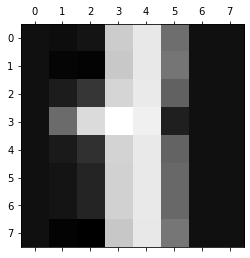

In [16]:
# Principal component analysis (PCA).

from sklearn.decomposition import PCA

# Количество компонентов, которые необходимо оставить n_components = 1
pca = PCA(n_components=1)

# Обучение данных, где image(матрица) - это количество выборок
pca.fit(image)

# Применяем уменьшение размерности нашей выборки.
X1_transform = pca.transform(image)

# Преобразуем данные обратно в исходное пространство.
X1_invert = pca.inverse_transform(X1_transform)

plt.matshow(X1_invert, cmap = 'gray')
plt.show()

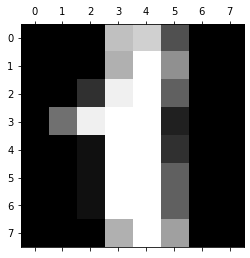

In [17]:
# Количество компонентов, которые необходимо оставить n_components = 5

pca = PCA(n_components=5)

pca.fit(image)

X5_transform = pca.transform(image)

X5_invert = pca.inverse_transform(X5_transform)

plt.matshow(X5_invert, cmap = 'gray')
plt.show()

Находим среднеквадратичную ошибку 

Посчитаем насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества  
компонент в PCA.

In [18]:
# Mean squared error regression loss. MSE
from sklearn.metrics import mean_squared_error

In [19]:
components = []
mse = []

for i in range(1, 50):
    pca = PCA(n_components=i)
    pca.fit(X)
    X_transformed = pca.transform(X)
    X_inverted = pca.inverse_transform(X_transformed)
    mse_ = round(mean_squared_error(X, X_inverted),3)
    components.append(i)
    mse.append(mse_)

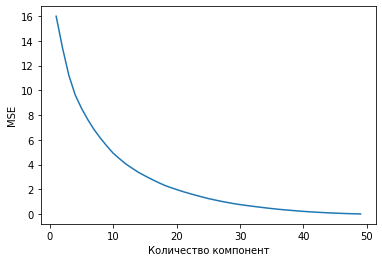

In [20]:
plt.plot(components, mse)
plt.xlabel('Количество компонент')
plt.ylabel('MSE')
plt.show()